In [82]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [83]:
import zipfile

In [84]:
file = r"C:\Users\91850\Downloads\ibm-hr-analytics-employee-attrition-performance.zip"

df = pd.read_csv(file, compression='zip')

In [85]:
df.shape

(1470, 35)

In [86]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [87]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [89]:
# here we have 35 columns lets sort out by their datatypes

df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

**Comment:**
- In this HR dataset we have 1470 rows and 35 columns.
- Here It seem contain no missing value or null value. Still we need to check datacintegrity for null values in form of '-', 'NA', any duplicate entry or error in data.
- Out of 35 columns we have 9 object datatypes and rest are int64 datatypes.
- Among all Numeric variables: 'Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance' are ordinal variable. Unique range of all these ordinal variable need to check.
- Here We have target variable 'Attrition'.

- **These ordinal features come with the following label encoding:**
- Education: 1-'Below College',2-'College',3-'Bachelor',4-'Master',5-'Doctor'
- EnvironmentSatisfaction: 1-'Low',2-'Medium',3-'High',4-'Very High'
- JobInvolvement: 1-'Low',2-'Medium',3-'High',4-'Very High'
- JobSatisfaction: 1-'Low',2-'Medium',3-'High',4-'Very High'
- PerformanceRating: 1-'Low',2-'Average',3-'Good',4-'Excellent',5-'Outstanding'
- RelationshipSatisfaction: 1-'Low',2-'Medium',3-'High',4-'Very High'
- WorkLifeBalance: 1-'Bad',2-'Good',3-'Better',4-'Best'

**Data Integrity Check**
- dataset is large, lets check for any entry which repeated or duplicated in dataset

In [90]:
df.duplicated().sum()  # it will check the duplicate data for all columns.

0

In [91]:
# Missing value check

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- There is no missing data! this will make it easier to work with the dataset.
- Dataset doesnot contain any duplicate entry, Missing values. So, Yes To Go !!!

**Statistical Matrix**

<Axes: >

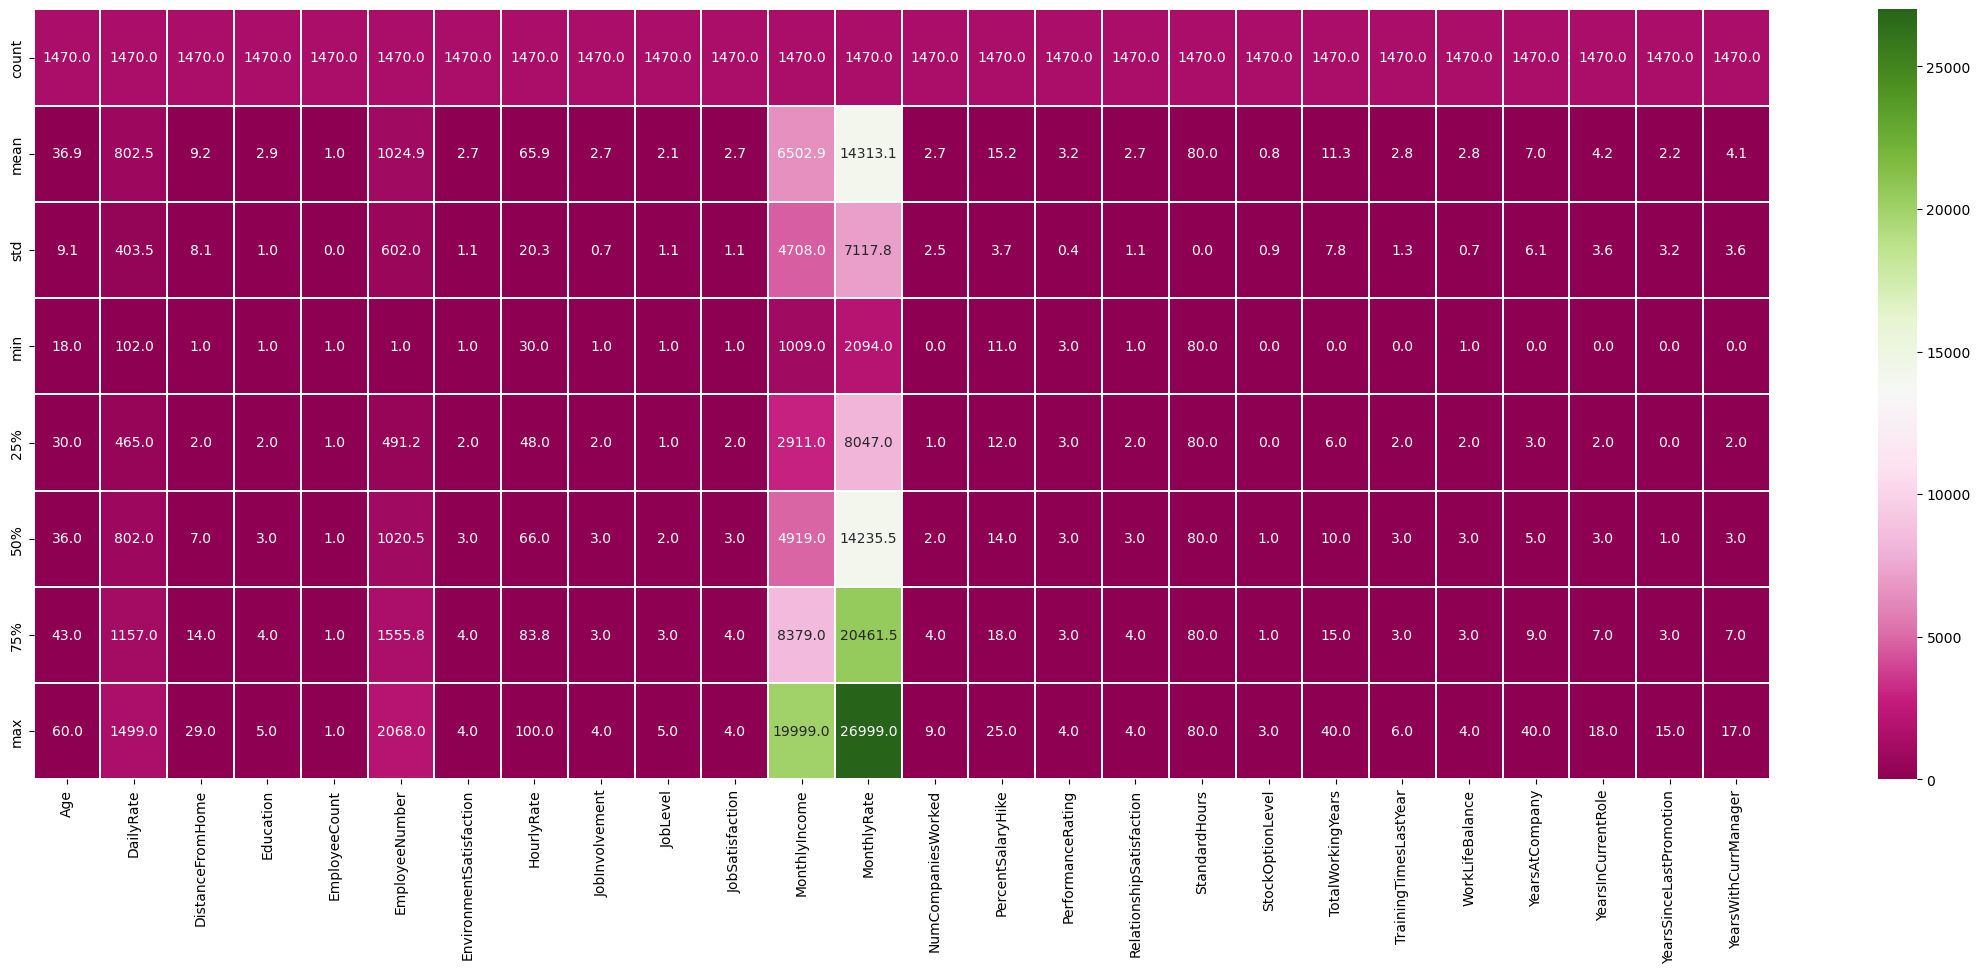

In [92]:
plt.figure(figsize=(28,10))
sns.heatmap(df.describe(),linewidths = 0.1, fmt='0.1f', annot=True, cmap='PiYG')

In [93]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.924,9.135,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.486,403.509,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.193,8.107,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.913,1.024,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000,0.000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865,602.024,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.722,1.093,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891,20.329,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.730,0.712,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.064,1.107,1.0,1.00,2.0,3.00,5.0


- Minimum Employee age is 18 and Maximum age of employee 60.
- Average distance from home is 9.1 KM. It means that most of employee travel atleast 18KM in day from home to office.
- On Average performace rating of employee is 3.163 with min value 3.0. This means that performance of most of employee is 'Good'.
- 50% of employees has worked atleast 2 companies previously.
- For monthly Income, Monthly rate by looking at 50% and max column we can say outliers in this feature.
- By Mean and Median we see that some of features are skew in nature
- For ordinal features statistical terminology of mean, median, std deviation doesnot make sense.
- StandardHours and EmployeeCount contain same value for all statistical parameter. It means they contain one unique value.

- **Do some Statistical Analysis. Start with target variable.**

In [94]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

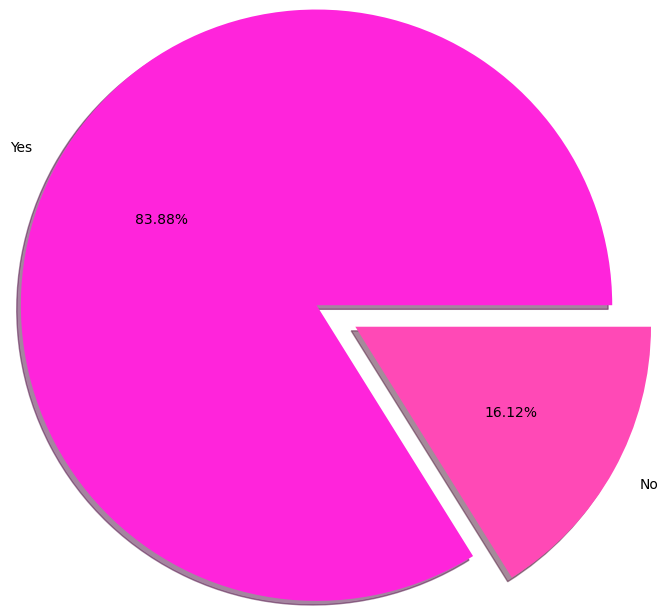

In [95]:
labels = 'Yes', 'No', 
fig, ax = plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels = labels,radius=2, autopct='%2.2f%%', explode=[0.1,0.2], shadow=True,)
plt.show()

- 83.88% Employees did not leave the organization while 16.12% did leave the organization making our dataset to be considered imbalanced since more people stay in the organization than they actually leave.

**Starting with Enlisting value counts & sub-categories of different categorical features available.**

In [96]:
Category = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*50)

Attrition
Attrition
No     1233
Yes     237
Name: count, dtype: int64
BusinessTravel
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
Department
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
EducationField
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Gender
Gender
Male      882
Female    588
Name: count, dtype: int64
JobRole
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
MaritalStatus
MaritalStatus
Married     673
Single 

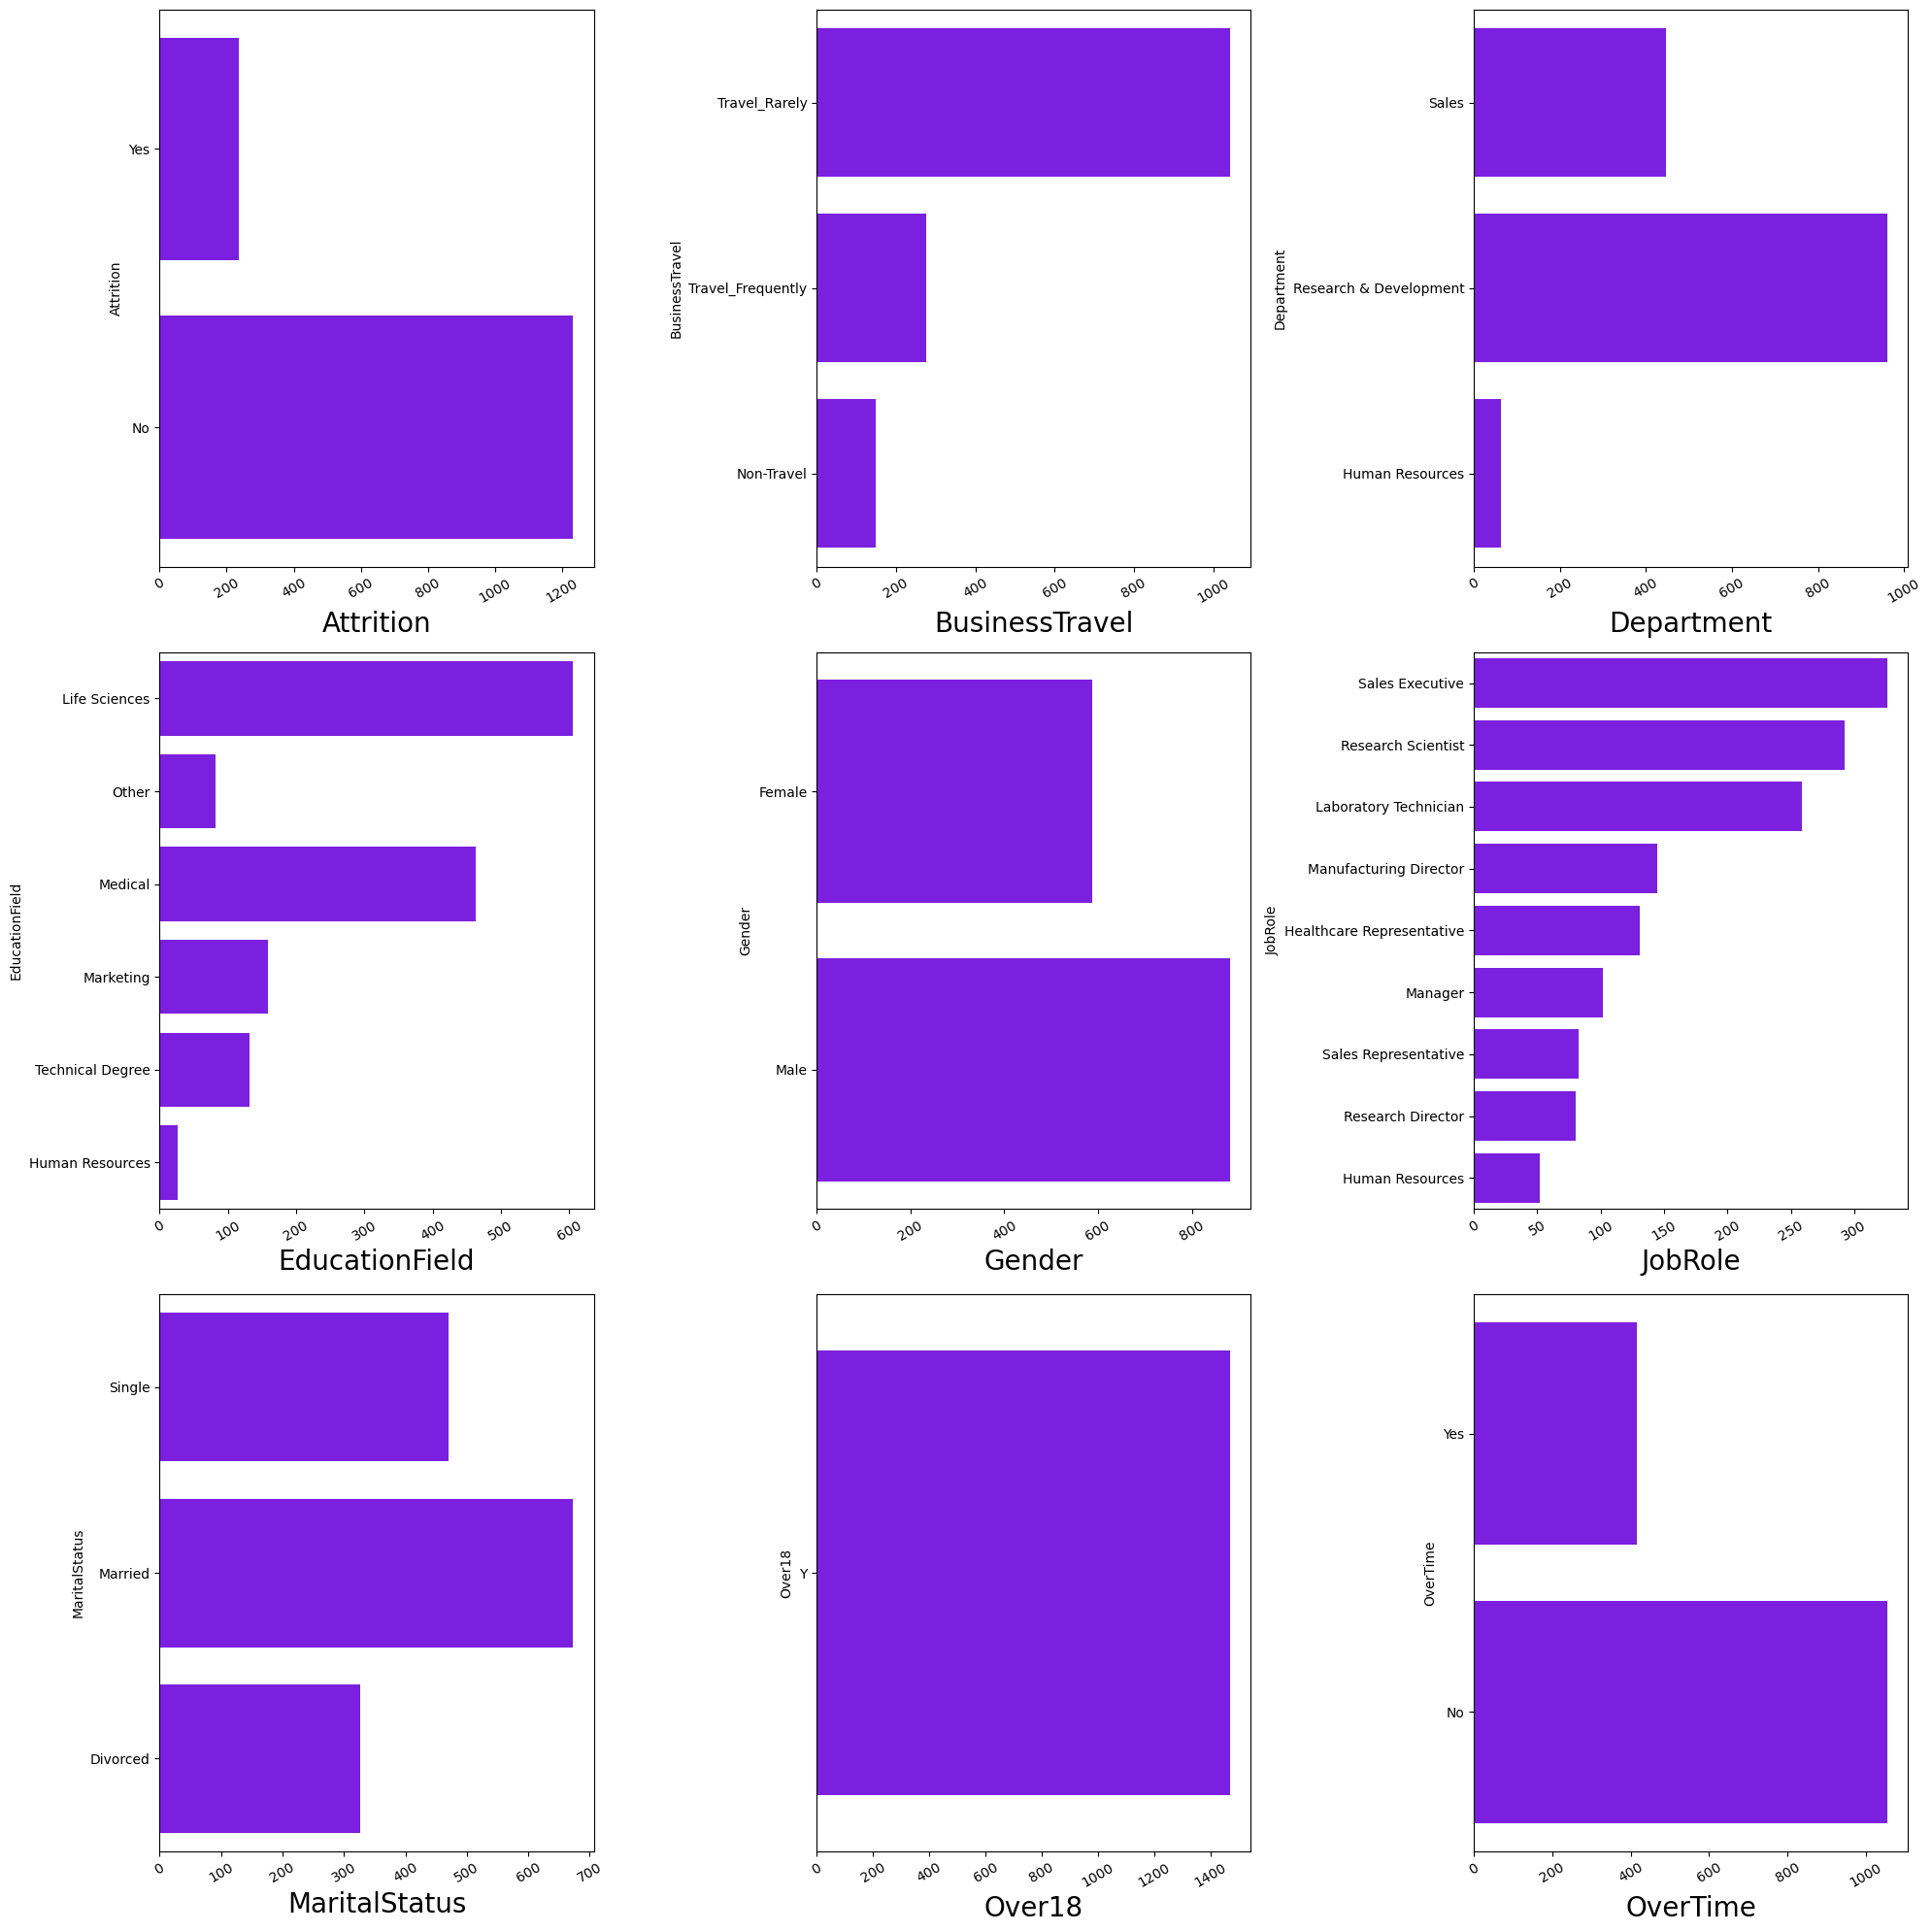

In [97]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='white')
pltn = 1
Category = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
for i in Category:
    if pltn <= 9:
        ax = plt.subplot(3,3,pltn)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    pltn +=1
plt.tight_layout()
plt.show()

**Enlisting value counts & sub-categories of different Ordinal features available**

In [98]:
Ordinal = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','PerformanceRating','WorkLifeBalance']

for i in Ordinal:
    print(i)
    print(df[i].value_counts())
    print("="*50)

Education
Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64
EnvironmentSatisfaction
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64
JobInvolvement
JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64
JobSatisfaction
JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64
RelationshipSatisfaction
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64
PerformanceRating
PerformanceRating
3    1244
4     226
Name: count, dtype: int64
WorkLifeBalance
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64


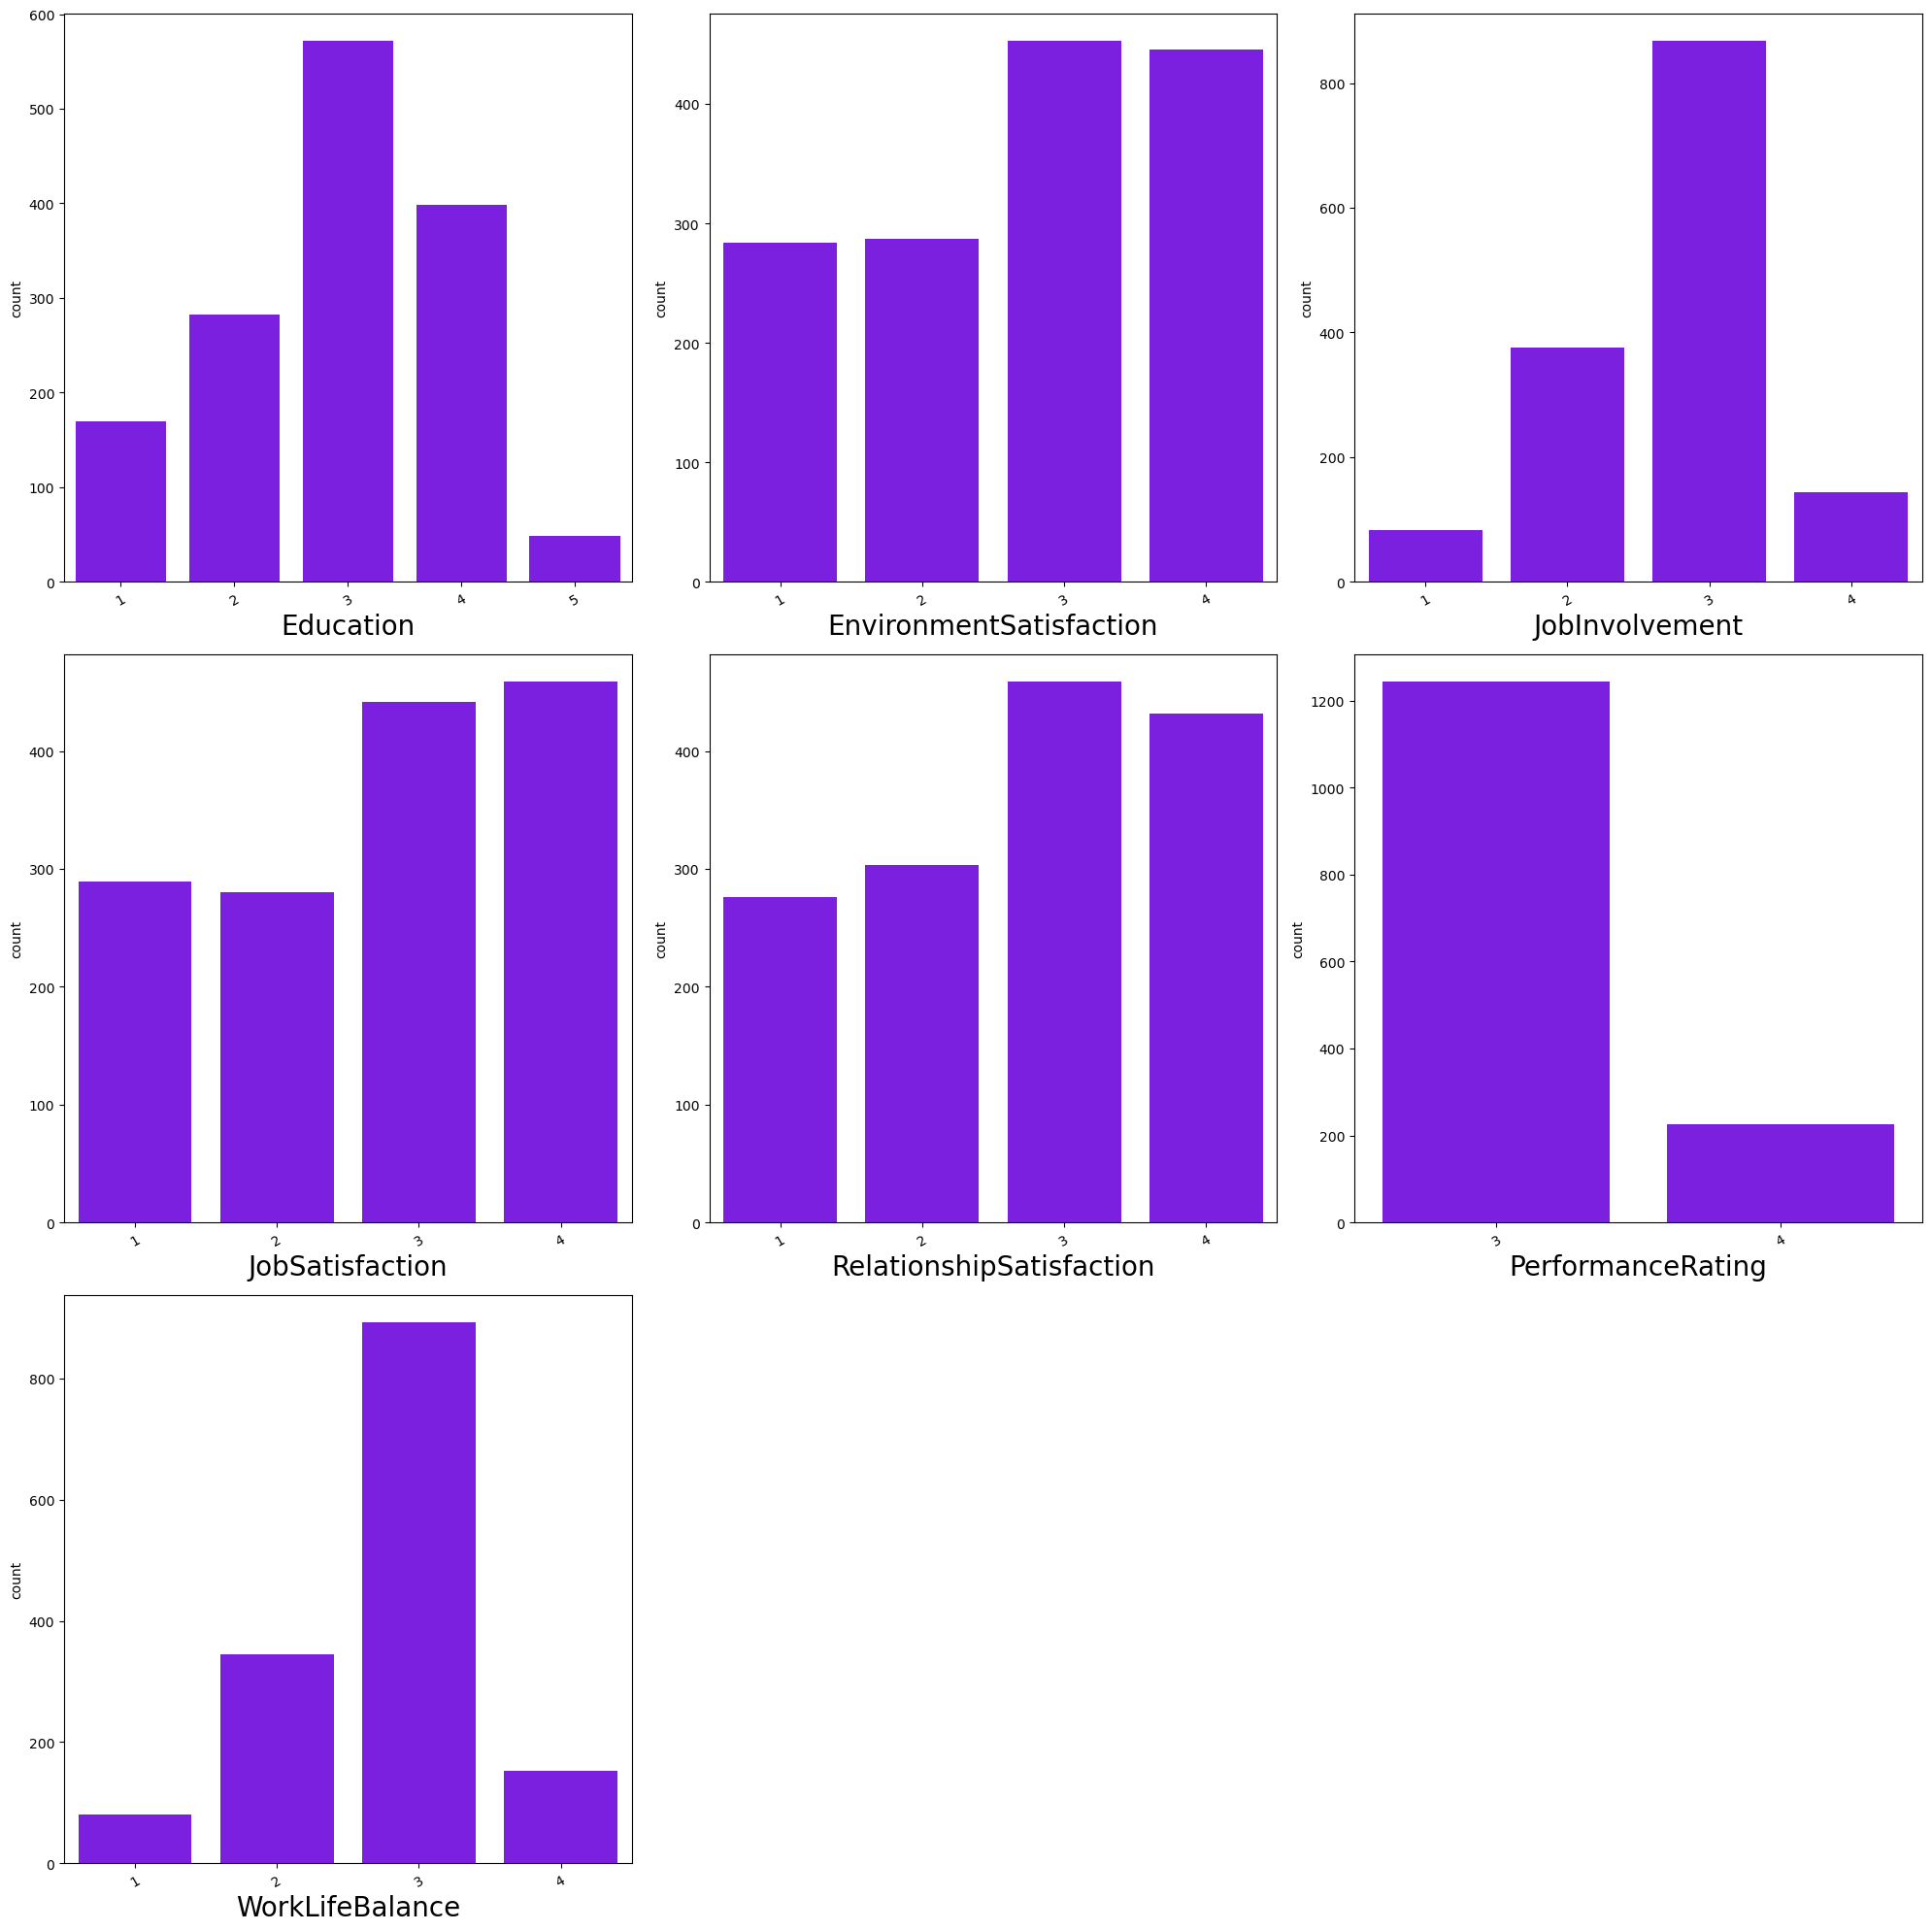

In [126]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='white')
pltn = 1
Ordinal = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','PerformanceRating','WorkLifeBalance']
for i in Ordinal:
    if pltn <= 9:
        ax = plt.subplot(3,3,pltn)
        sns.countplot(x=i, data=df)
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    pltn +=1
plt.tight_layout()
plt.show()

**Education level of Man power available**

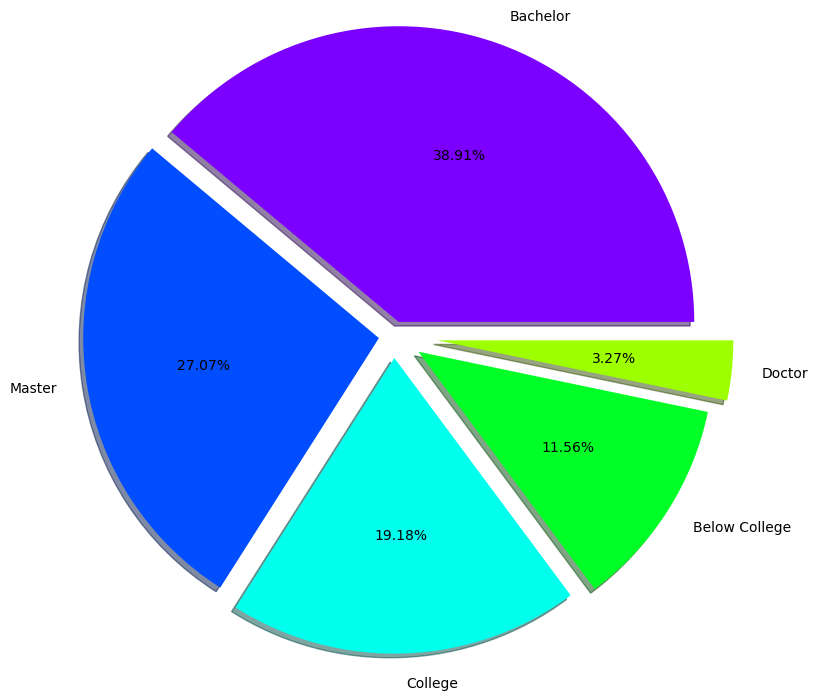

In [100]:
labels = 'Bachelor', 'Master', 'College', 'Below College', 'Doctor'
fig, ax = plt.subplots()
ax.pie(df['Education'].value_counts(), labels = labels, radius=2, autopct='%3.2f%%',explode=[0.1,0.1,0.15,0.2,0.3],shadow=True)
plt.show()

- More than 60% employees educated at Masters & Bachelor. It interesting to find out in which department nedd this human resources.
- 30% of employees are highly educatedwhich involves master and doctor degree.
- 39% of employees are graduate.
- Almost 19% employees are educated upto college & 12% are below college.

**Lets try again insight on to which department this human resource belong and education need of each department through visualization.**

In [101]:
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

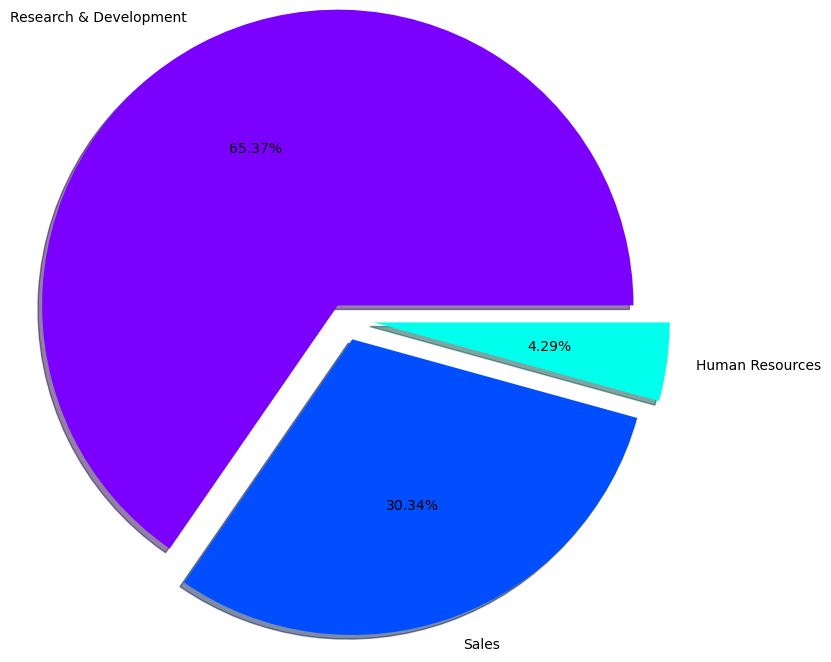

In [102]:
labels ='Research & Development','Sales','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['Department'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.15,0.2],shadow=True)
plt.show()

In [103]:
pd.crosstab([df.Education],[df.Department], margins=True).style.background_gradient(cmap='summer_r')

Department,Human Resources,Research & Development,Sales,All
Education,,,,
1,5,115,50,170
2,13,182,87,282
3,27,379,166,572
4,15,255,128,398
5,3,30,15,48
All,63,961,446,1470


- 65.37% employees belong to Research & Development Department. Out of Total 961 employee no of employee educated at Bachelors, Masters, Doctor are 379,255 and 30 respectively.
- only 63 employee work in HR department.

In [104]:
pd.crosstab([df.Education],[df.Department,df.Attrition], margins=True).style.background_gradient(cmap='summer_r')

**Employee distribution as per education field and level of education**

In [105]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

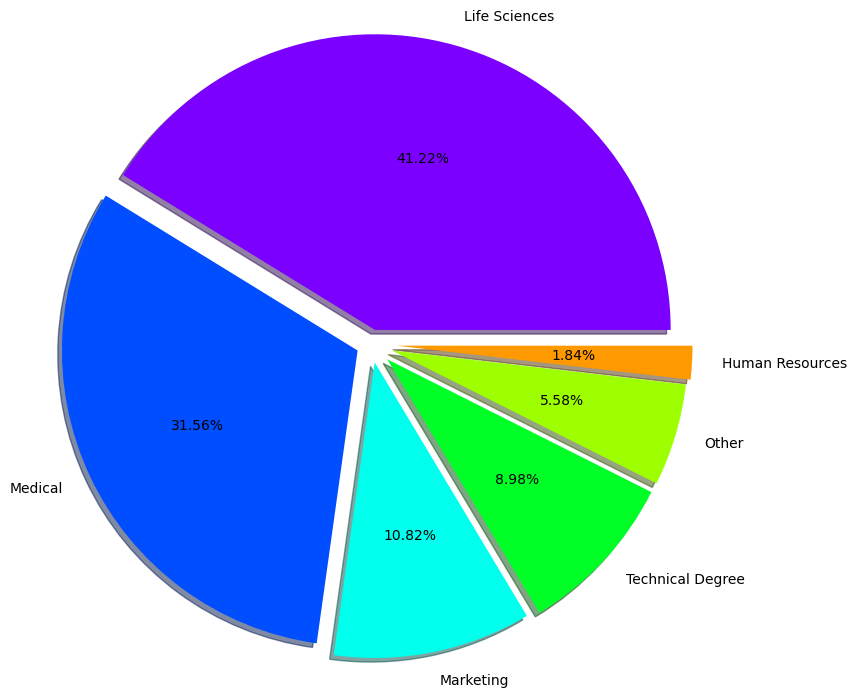

In [106]:
labels ='Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['EducationField'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.1,0.125,0.15,0.15,0.175],shadow=True)
plt.show()

In [107]:
# Check distribution of education vs education Field
pd.crosstab([df.Education],[df.EducationField], margins=True).style.background_gradient(cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Education,,,,,,,
1,2,67,14,63,5,19,170
2,2,116,24,99,19,22,282
3,16,233,59,183,24,57,572
4,5,173,52,104,33,31,398
5,2,17,10,15,1,3,48
All,27,606,159,464,82,132,1470


In [108]:
# Check distribution of department vs education Field
pd.crosstab([df.Department],[df.EducationField], margins=True).style.background_gradient(cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Department,,,,,,,
Human Resources,27,16,0,13,3,4,63
Research & Development,0,440,0,363,64,94,961
Sales,0,150,159,88,15,34,446
All,27,606,159,464,82,132,1470


- 41.22% employee comes from Life science background followed by Medical profession with 31.56%.
- There are only 27 people with HR background and We know that 63 people work in HR department from previous result. This implies that atleast half employee working in HR department do not have HR background.
- Most of employee with Technical degree are Bachelors.
- Most of employee having masters and doctors belong go life science and medical domain.
- R & D department almost everyone comes from profession or technical background except support staff. Factor like Salary Hike, travelling, overtime, and Job level are things need to taken in consideration while analysing Attrition of this category.
- There are 159 employee with Marketing background and all work in sales Department.
- 50% employees in sales department have background of life sciences & medical. So it will interesting to see attrition rate in these employees.

**We will Analysis Attrition over above insight in next section of Job role.**   

**Lets work with Job Role**

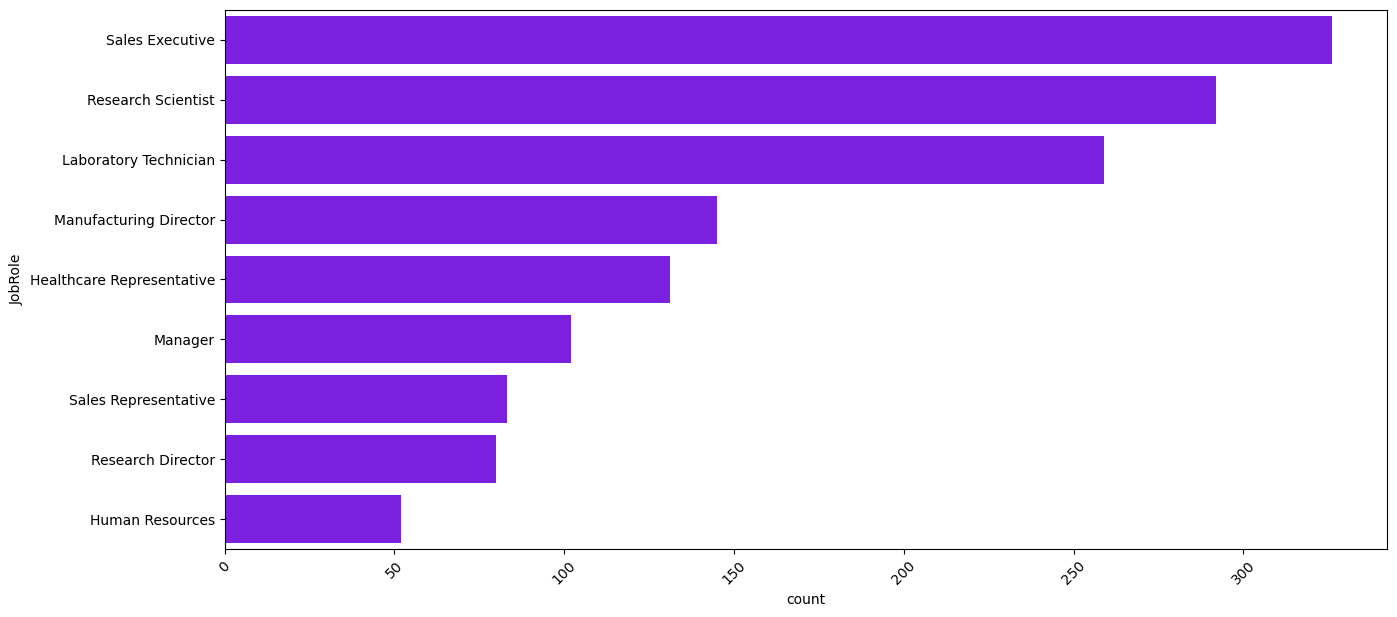

In [109]:
plt.figure(figsize=(15,7))
sns.countplot(df['JobRole'])
plt.xticks(rotation=45)
plt.show()

- **Before going for Attrition by Job role,**

first build matrix of department vs job role which will give us idea about number of employees of different job role across department

In [110]:
pd.crosstab([df.JobRole],[df.Department],margins=True).style.background_gradient(cmap='gist_rainbow_r')

Department,Human Resources,Research & Development,Sales,All
JobRole,,,,
Healthcare Representative,0,131,0,131
Human Resources,52,0,0,52
Laboratory Technician,0,259,0,259
Manager,11,54,37,102
Manufacturing Director,0,145,0,145
Research Director,0,80,0,80
Research Scientist,0,292,0,292
Sales Executive,0,0,326,326
Sales Representative,0,0,83,83


- There are 3 job role in HR department, maximum of which are sales Executive with 446 Total Employees.
- Human Resources department has 2 job role i.e. HR & Manager
- There are 6 different job role R&D department with total 961 employees and until now we know that all of them belong to thier respective domain background.

<Figure size 1200x1000 with 0 Axes>

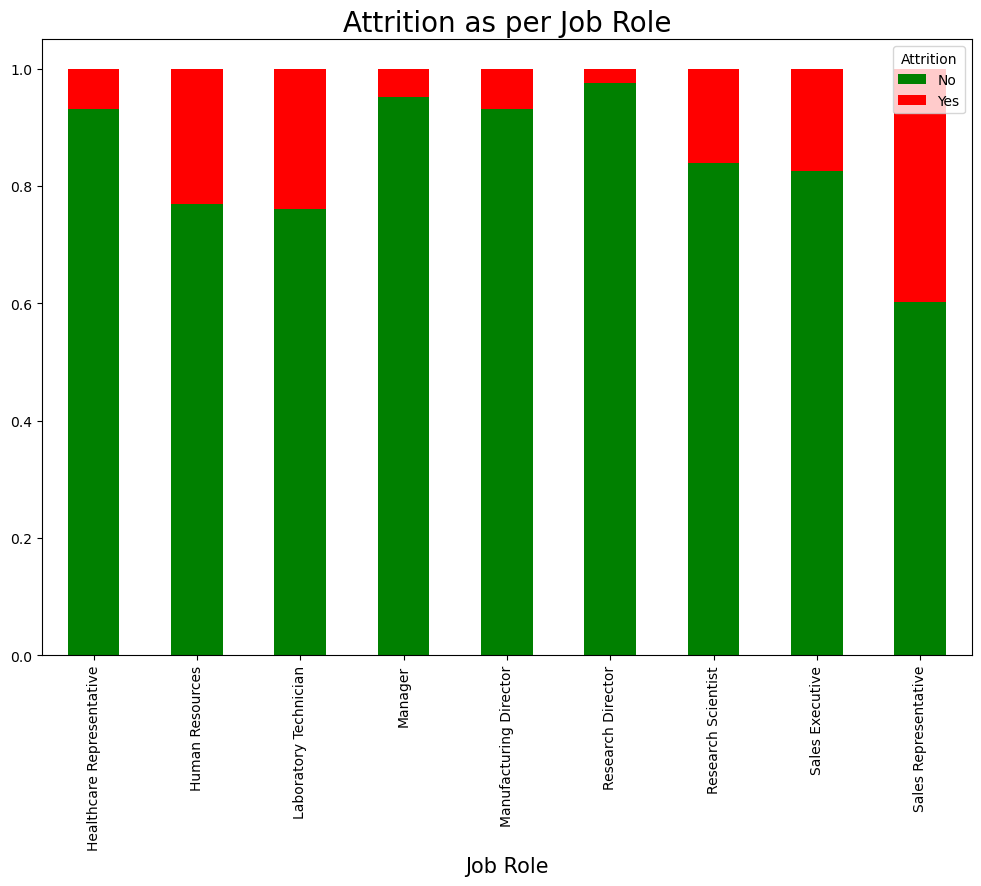

In [111]:
plt.figure(figsize=(12,10))
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, 
                    color=['green', 'red'],figsize=(12,8))
plt.title('Attrition as per Job Role', fontsize=20)
plt.xlabel('Job Role',fontsize=15)
plt.show()

**We can definitely see Red signal for different Managers & HR of Respective Job Role in above barplot.**

Bar plot showing % attrition across each job role, let check absolute number matrix of attrition, again this time using crosstab.

In [112]:
pd.crosstab([df.JobRole,df.Department],[df.Attrition], margins=True).style.background_gradient(cmap='gist_rainbow_r')

- Percentage of attrition is high in sales Representative, Laboratory Technician, human Resources. this all job role comes at bottom in corporate hierachy also Salary is comparatively less compare to other job role.
- Monthly Income, Job statisfaction, travelling are feature need to dive into for further insights in these job role.
- At the top chrt 62 Laboratory Technician has resign from job, followed by 57 sales executive and 47 Research Scientist.
- 16% attrition rate for Research Scientist, which involve huge investment from company. Company not only loses employee but its knowledge base, expertise & Intellatual property rights in some cases.

In [113]:
# grouping Numeric Features
Numeric=['Age', 'DailyRate', 'DistanceFromHome',  
 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [114]:
Numeric_int=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate', 
             'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear',
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

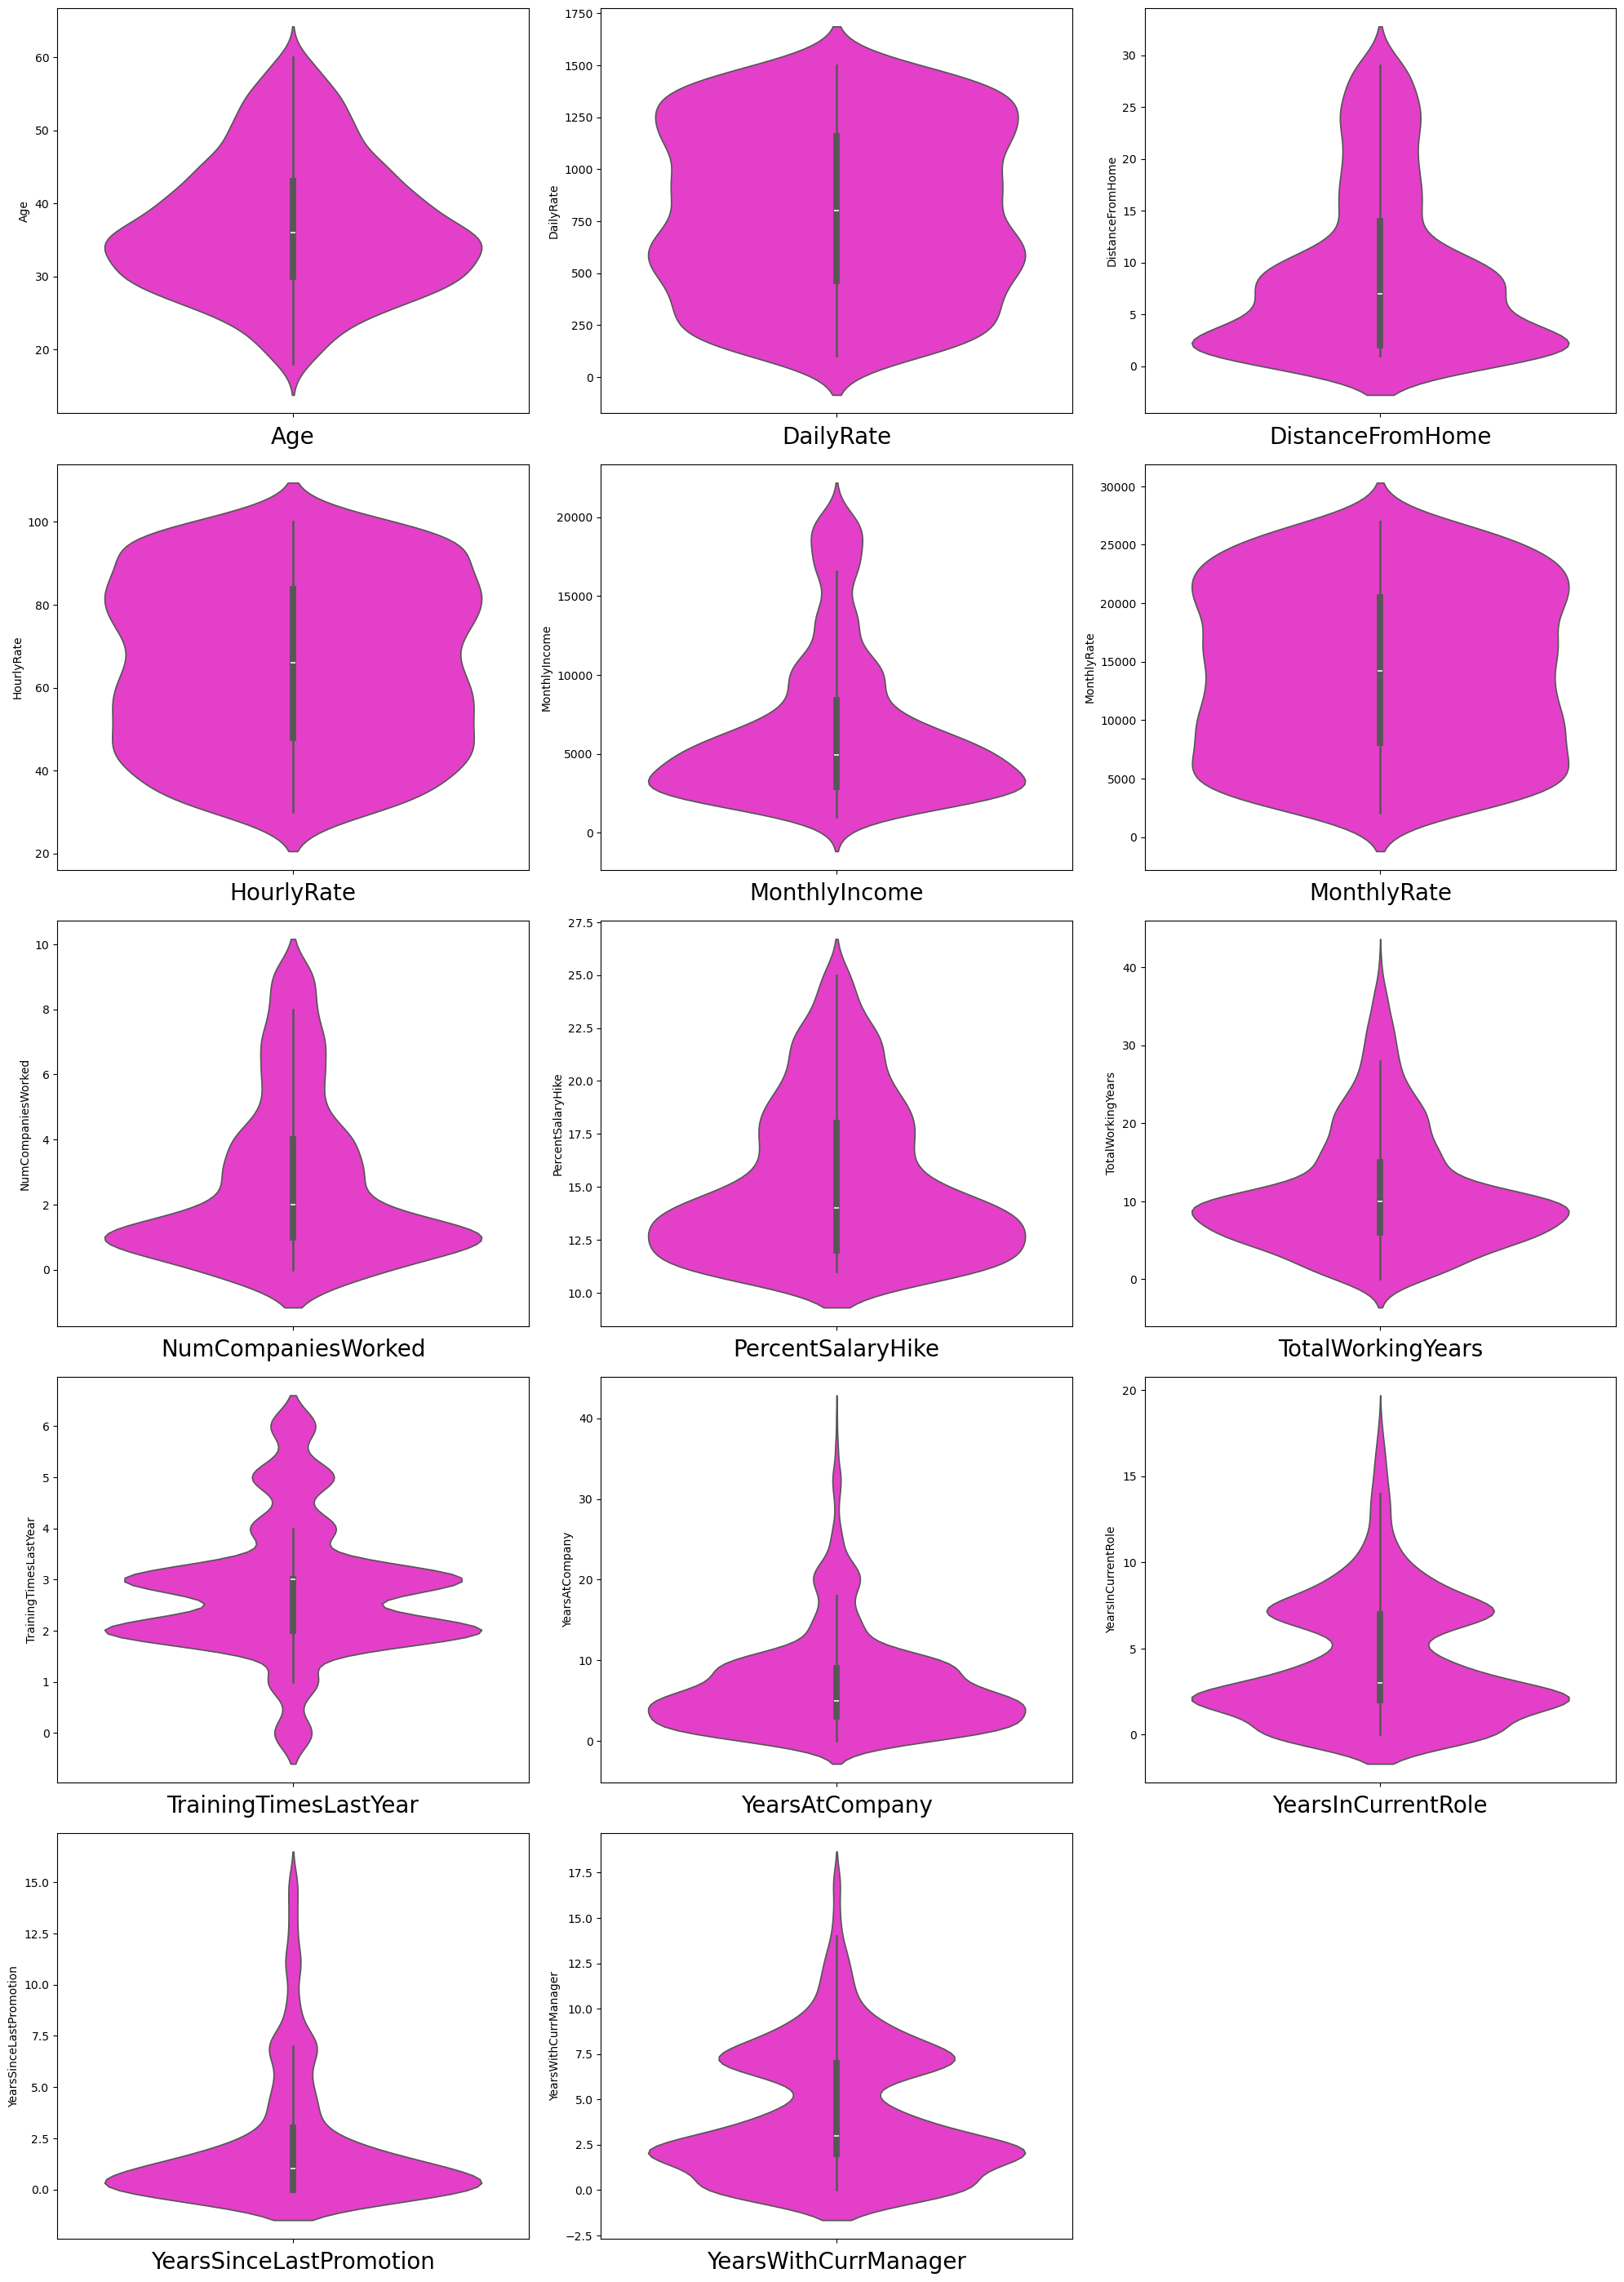

In [115]:
sns.set_palette('spring')
plt.figure(figsize=(20,50), facecolor='white')
plotnumber =1

for i in Numeric_int:
    if plotnumber <=25:
        ax = plt.subplot(9,3,plotnumber)
        sns.violinplot(df[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

- For majority of people have spend 3 to 10 years at company.
- most of people staying company upto 2 years after promotion
- Majority of people are train 2-3 times in last year. If employees leaves job then it loss investment for company.
- Majority of people stay in same role for maximum 4 yrs.
- Majority of employees have salary hike of 10 to 15%.

**Age vs Attrition**

<Axes: xlabel='Age', ylabel='count'>

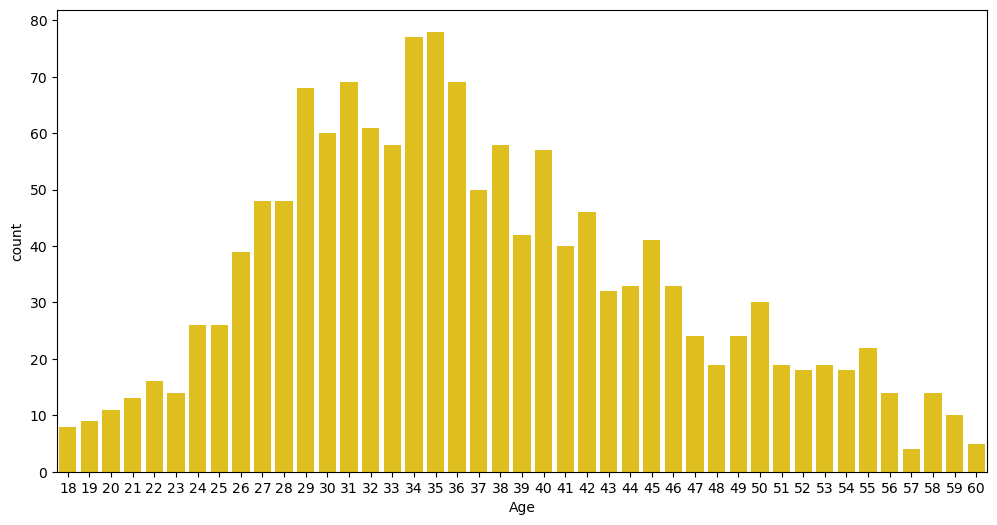

In [125]:
plt.subplots(figsize=(12,6))
sns.countplot(x='Age', data=df)

<Axes: xlabel='Age', ylabel='count'>

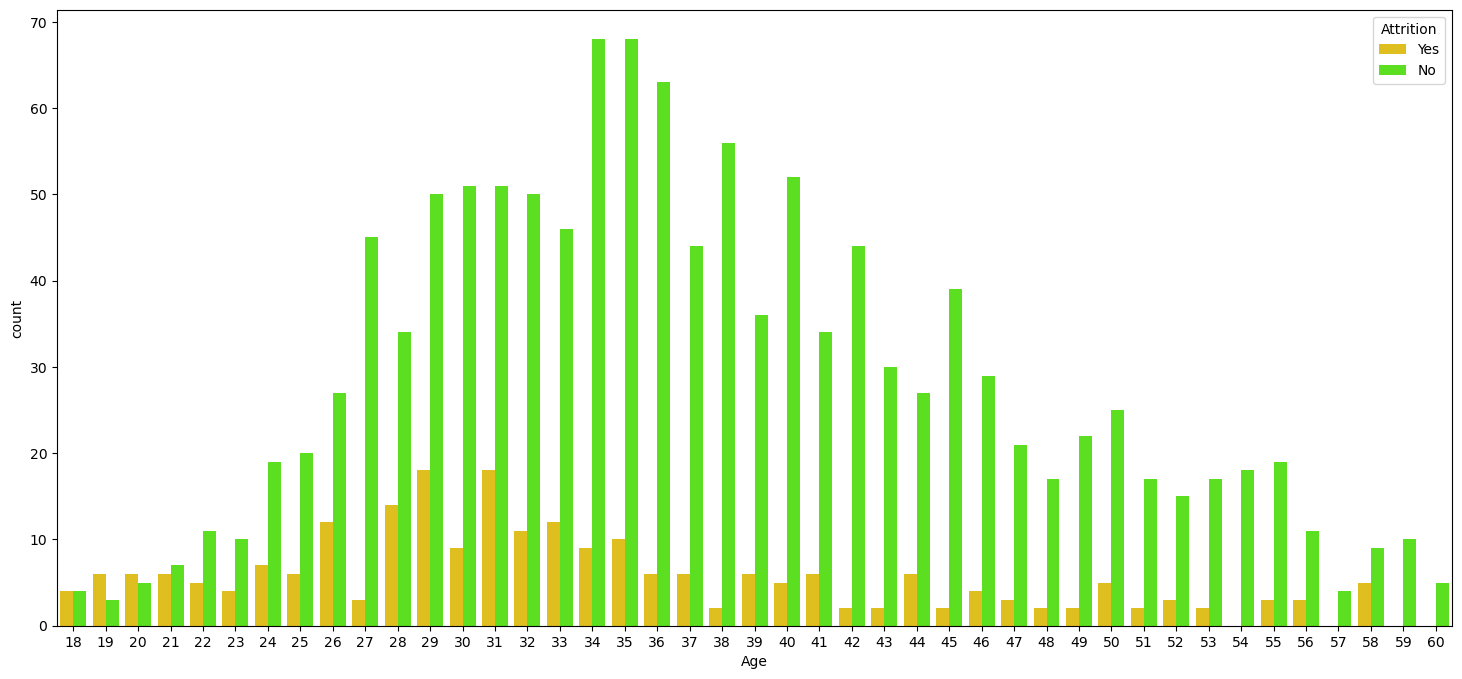

In [119]:
sns.set_palette('hsv')
plt.subplots(figsize=(18,8))
sns.countplot(x='Age', hue='Attrition', data=df)

- Attrition rate is minimum between the Age years of 34 and 35.
- Attrition rate is maximum between the Age years of 29 and 31.

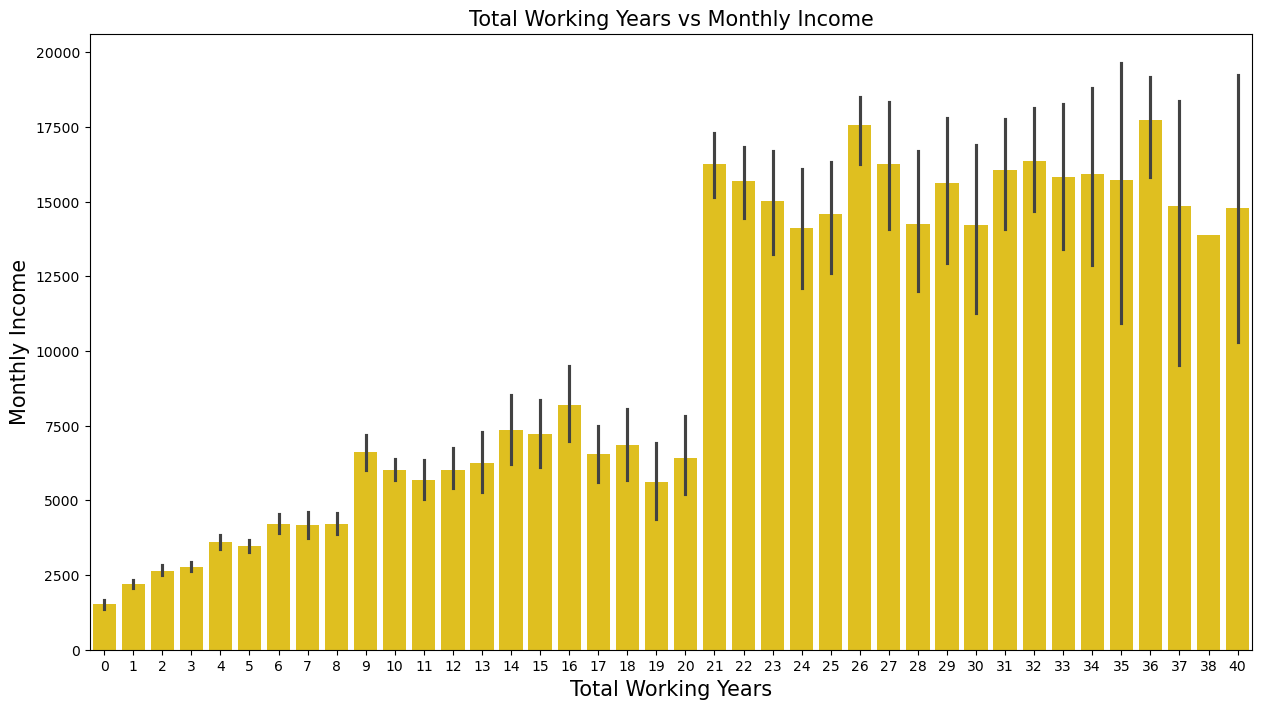

In [124]:
plt.figure(figsize=(15,8))
sns.barplot(x='TotalWorkingYears', y= 'MonthlyIncome', data=df)
plt.xlabel('Total Working Years',fontsize=15)
plt.ylabel('Monthly Income',fontsize=15)
plt.title('Total Working Years vs Monthly Income', fontsize=15)
plt.show()

- Monthly Income is highest for the employees with 21 or more number of Total Working years.

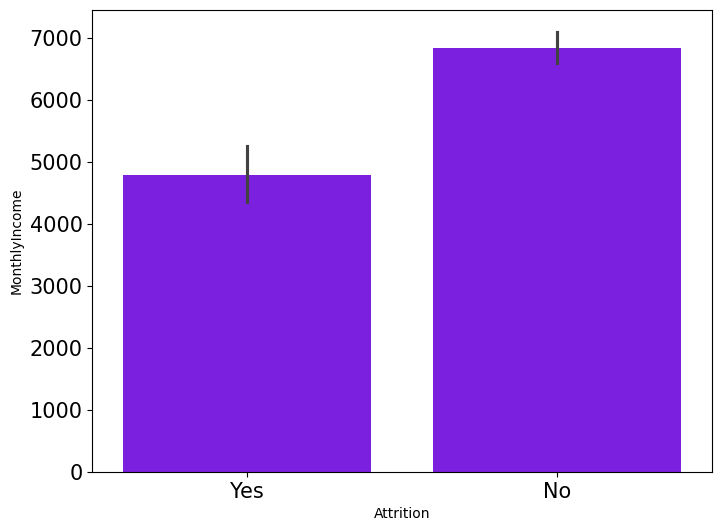

In [129]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='MonthlyIncome', data=df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

- The Attrition rate in the employees is less when the monthly income reaches to 6900.

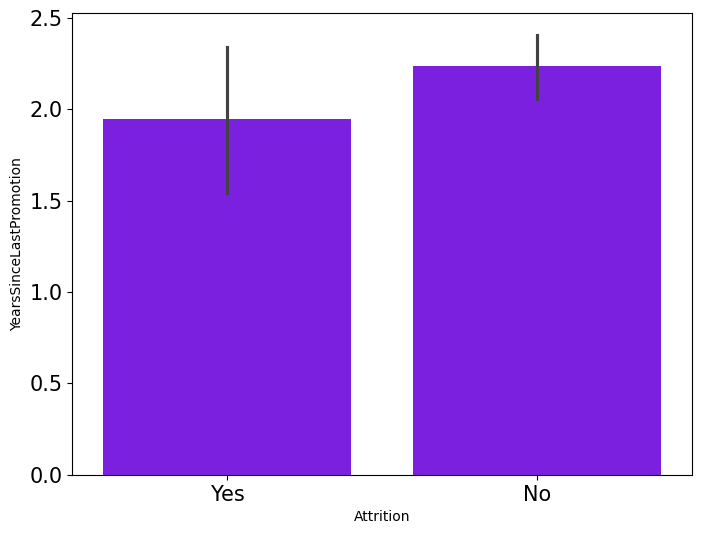

In [130]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='YearsSinceLastPromotion', data=df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

- The rate of Attrition is high when the employee did not promoted since 1.8 years.

In [131]:
df = pd.read_csv(file,compression='zip')

**Encoding categorical data**

In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [135]:
# Drop unnecessary columns
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"],axis=1, inplace=True)

In [136]:
df.shape

(1470, 31)

In [137]:
# Ordinal Encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

oe_col = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
df = ordinal_encode(df, oe_col)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


**Outliers Detection and Removal**

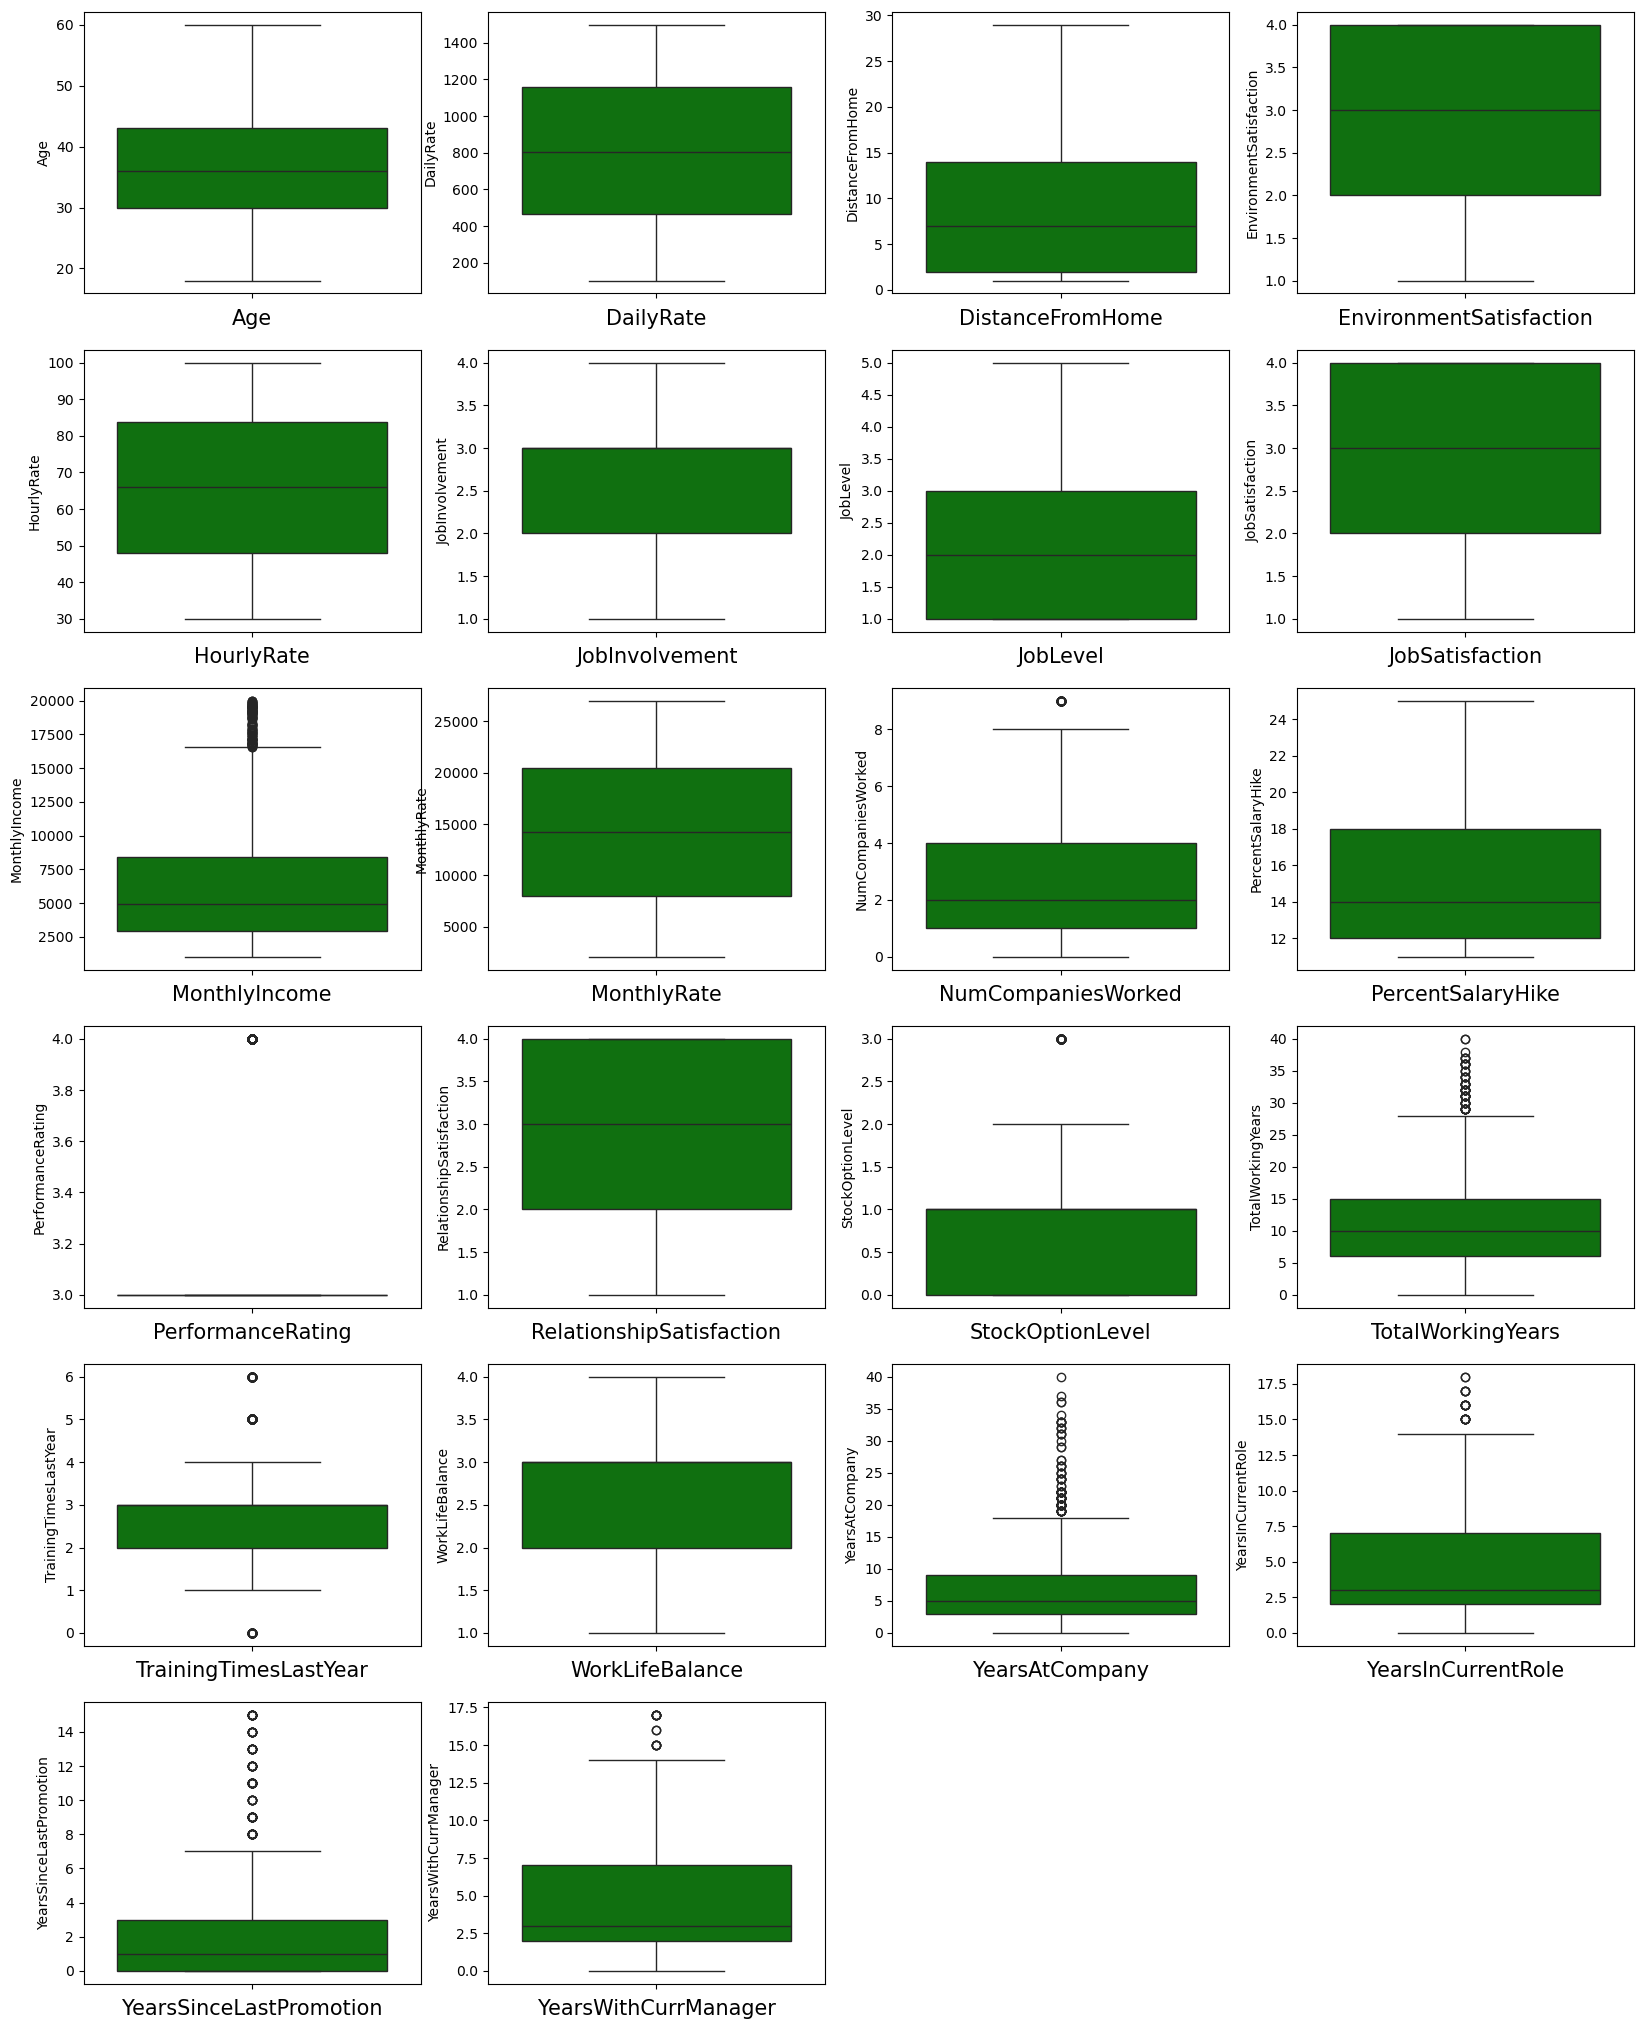

In [138]:
plt.figure(figsize=(20,30),facecolor='white')
plotn=1

for col in Numeric:
    if plotn <= 28:
        ax=plt.subplot(7,4,plotn)
        sns.boxplot(df[col],color='g')
        plt.xlabel(col,fontsize=15)
    plotn += 1
plt.show()

**Features containing outliers**
"MonthlyIncome","NumCompaniesWorked","PerformanceRating","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","Attrition".

In [141]:
from scipy.stats import zscore

z=np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis=1)]

print('before removing outliers: ', df.shape)
print('After removing outliers: ',df1.shape)
print("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

before removing outliers:  (1470, 31)
After removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


In [142]:
# Data Loss
print("Percentage of data loss: ", ((1470-1387)/1470)*100,'%')

Percentage of data loss:  5.646258503401361 %


**Feature selection and Engineering**

**1. Skewness of features**

In [143]:
df.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [144]:
# Splitting data in target and dependent feature
X=df.drop(['Attrition'],axis=1)
Y=df['Attrition']

**Transforming skew data using power transform**

In [147]:
from sklearn.preprocessing import power_transform
df=power_transform(X)
df = pd.DataFrame(df, columns=X.columns)
df.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
Y

**Comment:**
- For Numeric features skewness is transform within permissible limit.
- For ordinal features & categorical features skew parameter irrevalent.

**2. Correlation**

In [148]:
df.corr()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.019607,0.019864,-0.036344,-0.025855,0.215520,-0.037564,0.013967,-0.037163,0.026203,...,-0.002365,0.037296,0.089449,0.652405,-0.014951,-0.016180,0.207538,0.145404,0.114162,0.142446
BusinessTravel,0.019607,1.000000,-0.001984,-0.003560,-0.007041,-0.006468,0.034658,0.004183,-0.011439,0.026364,...,-0.021061,-0.036165,-0.006092,0.027298,0.006192,-0.017977,-0.024021,-0.035610,-0.033148,-0.032665
DailyRate,0.019864,-0.001984,1.000000,-0.003546,-0.006034,-0.017504,0.040993,0.034324,-0.003271,0.015156,...,0.000687,0.005771,0.049415,0.042750,0.005118,-0.046550,0.005391,0.022143,-0.035448,0.005908
Department,-0.036344,-0.003560,-0.003546,1.000000,0.037834,0.012780,0.082525,-0.013867,-0.030950,-0.000623,...,-0.038429,-0.037572,-0.000630,-0.006833,0.039938,0.017807,0.025457,0.057817,0.017699,0.024241
DistanceFromHome,-0.025855,-0.007041,-0.006034,0.037834,1.000000,0.002714,0.021074,-0.013409,0.010557,0.015607,...,0.013212,0.009379,0.027082,-0.012129,-0.015334,-0.030011,0.006570,0.013091,-0.003873,-0.002310
Education,0.215520,-0.006468,-0.017504,0.012780,0.002714,1.000000,-0.038405,-0.026095,-0.017807,0.011105,...,-0.023157,-0.004863,0.025621,0.150720,-0.023039,0.010164,0.037921,0.051072,0.016076,0.026651
EducationField,-0.037564,0.034658,0.040993,0.082525,0.021074,-0.038405,1.000000,0.042609,0.005059,-0.004372,...,-0.001393,-0.018254,-0.012936,-0.001827,0.054321,0.034788,0.004483,0.004372,0.023062,0.028189
EnvironmentSatisfaction,0.013967,0.004183,0.034324,-0.013867,-0.013409,-0.026095,0.042609,1.000000,-0.014940,-0.042512,...,-0.024853,0.016892,0.024345,-0.013356,-0.018350,0.030422,0.012338,0.029218,0.038031,0.006417
Gender,-0.037163,-0.011439,-0.003271,-0.030950,0.010557,-0.017807,0.005059,-0.014940,1.000000,0.005618,...,-0.010757,0.041439,0.024390,-0.049776,-0.039213,0.002726,-0.046018,-0.028101,-0.016131,-0.027972
HourlyRate,0.026203,0.026364,0.015156,-0.000623,0.015607,0.011105,-0.004372,-0.042512,0.005618,1.000000,...,-0.006571,0.005207,0.041329,-0.012902,-0.018396,-0.013811,-0.032827,-0.035899,-0.062271,-0.022931


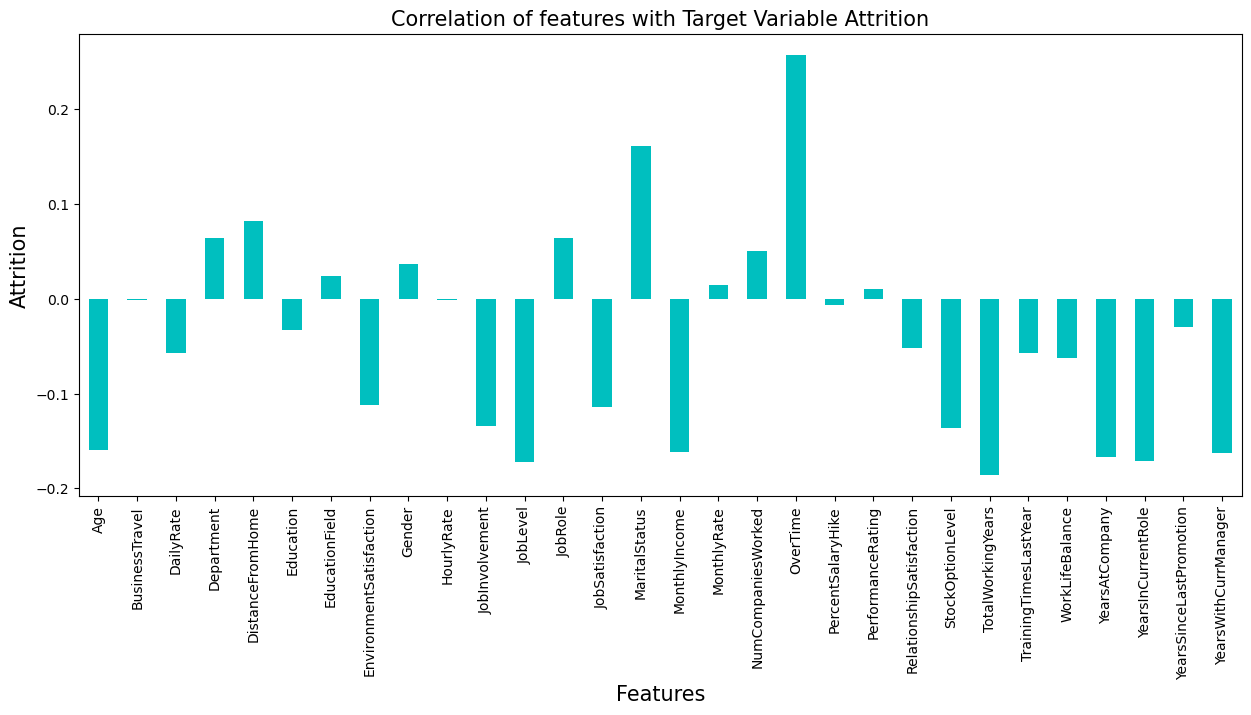

In [150]:
plt.figure(figsize=(15,6))
df1.corr()['Attrition'].drop(['Attrition']).plot(kind='bar', color='c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Attrition',fontsize=15)
plt.title("Correlation of features with Target Variable Attrition", fontsize=15)
plt.show()

- Age, JobLevel, MonthlyIncome is highly positively correlated with TotalWorkingYears.
- JobLevel is highly positively correlated with the MonthlyIncome.
- PercentSalaryHike is highly positively correlated with the column PerformanceRating.

**3. Checking Multicollinearity between features using variance_inflation_factor**

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features'] = df.columns
vif

,VIF,Features
0,1.930457,Age
1,1.014314,BusinessTravel
2,1.025841,DailyRate
3,2.172093,Department
4,1.017385,DistanceFromHome
5,1.065266,Education
6,1.030480,EducationField
7,1.024396,EnvironmentSatisfaction
8,1.024366,Gender
9,1.024189,HourlyRate


- We can see that multicollinearity is within permissible limit of 10.

**Balancing using SMOTE**

As data is Imbalanced in nature we will need to balance target variable

In [152]:
from imblearn.over_sampling import SMOTE


In [153]:
# Oversampling using SMOTE techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [154]:
Y.value_counts()

Attrition
1    1158
0    1158
Name: count, dtype: int64

**Standard Scaling**

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

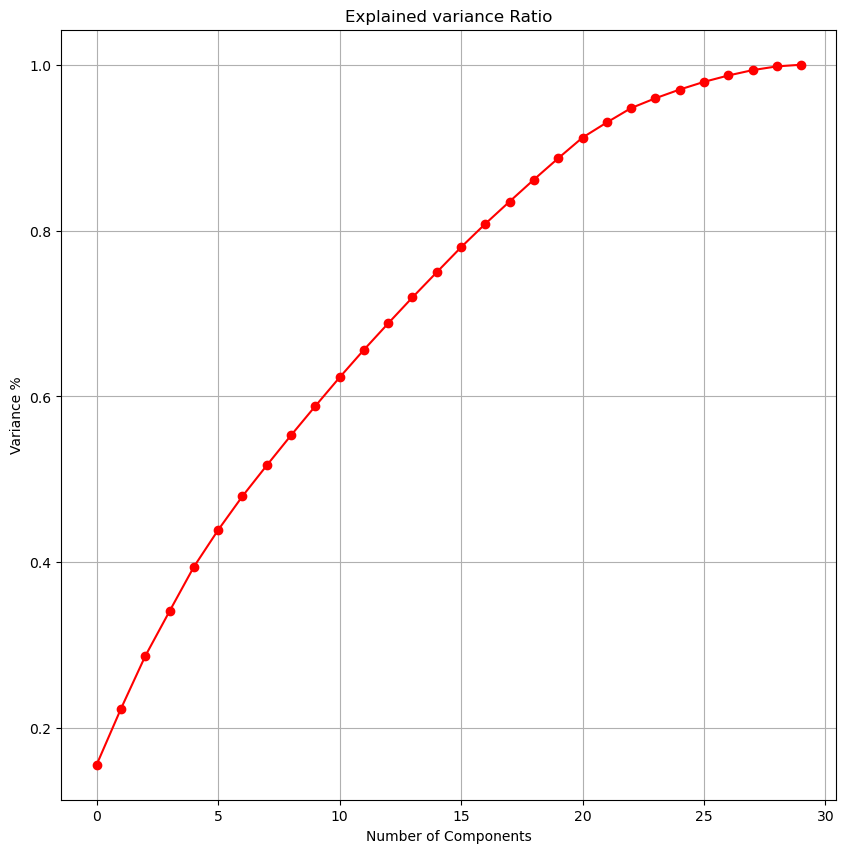

In [158]:
from sklearn.decomposition import PCA
pca = PCA()
# plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

- As per the graph, we can see that 21 principal components attribute for 90% of variation in the data. We shall pick the first 21 components for our prediction.

In [159]:
pca_new = PCA(n_components=21)
x_new = pca_new.fit_transform(X_scale)

In [160]:
principle_x=pd.DataFrame(x_new,columns=np.arange(21))

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1551, 21)
Training target vector size: (1551,)
Test feature matrix size: (765, 21)
Test target vector size: (765,)


In [168]:
maxAccu = 0
maxrs = 0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size=.33, random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    y_pre = lr.predict(X_test)
    acc = accuracy_score(Y_test,y_pre)
    if acc>maxAccu:
        maxAccu=acc
        maxrs=i
print('Best accuracy:', maxAccu, 'Random_state:', maxrs)

Best accuracy: 0.8718954248366013 Random_state: 159


In [170]:
X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.33, random_state = 159)
lr = LogisticRegression()
lr.fit(X_train,Y_train)
lr.score(X_train,Y_train)
pred = lr.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, pred))
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, pred))
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, pred))

Logistics Regression Evaluation
Accuracy Score of Logistics Regression : 0.8718954248366013
Confusion matrix of Logistics Regression : 
 [[329  54]
 [ 44 338]]
classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       383
           1       0.86      0.88      0.87       382

    accuracy                           0.87       765
   macro avg       0.87      0.87      0.87       765
weighted avg       0.87      0.87      0.87       765



In [171]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rms_val = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)
    model.fit(X_train,Y_train)
    pred = model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,pred))
    rms_val.append(error)
    print('RMSE value for k= ', K, 'is: ', error)

RMSE value for k=  1 is:  0.3597384670922507
RMSE value for k=  2 is:  0.3110177264140918
RMSE value for k=  3 is:  0.3894020890135344
RMSE value for k=  4 is:  0.34108630767160053
RMSE value for k=  5 is:  0.39107694443752145
RMSE value for k=  6 is:  0.34866692910423897
RMSE value for k=  7 is:  0.40260589075170505
RMSE value for k=  8 is:  0.37399101733297235
RMSE value for k=  9 is:  0.4216370213557839
RMSE value for k=  10 is:  0.40422604172722165


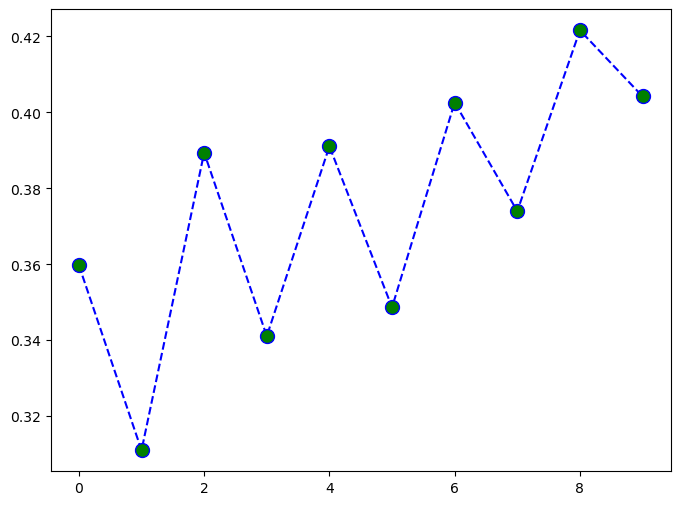

In [178]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(10), rms_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

- At k=2 we get the minimum RMSE value which approximately 0.3110177264140918, and shoots up on further increasing the k value. We can safely say that k=2 will give us the best result in this case.

In [184]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier(n_neighbors=22)
model=[rf,dt,knn]
for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('================================================')

    # cross Validation
    score = cross_val_score(m, principle_x,Y,cv=5)
    print('\033[1m'+'Cross Validation Score: ',m,':'+'\033[1m')
    print("Score: ",score)
    print("Mean CV Score: ",score.mean())
    print("Std deviation : ",score.std())
    print('\n')
    print('=================================')

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is
Accuracy Score :
 0.8993464052287582
Confusion matrix : 
 [[342  41]
 [ 36 346]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       383
           1       0.89      0.91      0.90       382

    accuracy                           0.90       765
   macro avg       0.90      0.90      0.90       765
weighted avg       0.90      0.90      0.90       765

Cross Validation Score:  RandomForestClassifier() :
Score:  [0.72198276 0.9287257  0.91792657 0.91360691 0.91792657]
Mean CV Score:  0.8800337007522157
Std deviation :  0.07918321819610105


Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is
Accuracy Score :
 0.7777777777777778
Confusion matrix : 
 [[287  96]
 [ 74 308]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       383
           

**Hyper Parameter Tuning: GridSearchGV**

In [185]:
from sklearn.model_selection import GridSearchCV

In [186]:
parameter = { 'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}

In [187]:
GCV = GridSearchCV(RandomForestClassifier(), parameter, cv=5, n_jobs=-1, verbose=3)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100]},
             verbose=3)

In [188]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 100}

**Final Model**

In [189]:
final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 100, max_depth=50 ,max_features='auto')
final_mod.fit(X_train,Y_train)
y_pred=final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.9019607843137255


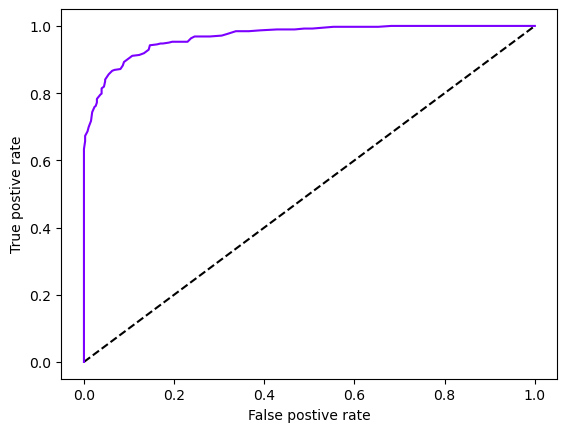

Auc Score :
 0.9019623255368884


In [190]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = final_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

**Saving Model**

In [191]:
import joblib
joblib.dump(final_mod, 'HR_Analytics.pkl')

['HR_Analytics.pkl']